# House Sales full project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Data Manipulation
### Import Data

In [40]:
df = pd.read_csv('kc_house_data.csv', index_col=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Handle NaN values

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long       

In [42]:
mean_bed = df.bedrooms.mean()
df.bedrooms.replace(np.nan, mean_bed, inplace=True)
mean_bath = df.bathrooms.mean()
df.bathrooms.replace(np.nan, mean_bath, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long       

### Drop columns with correlation < 0.2

In [43]:
df['date'] = df.date.str.split('T', expand=True)[0]
df.corr()['price']

id              -0.016762
date             0.003033
price            1.000000
bedrooms         0.308797
bathrooms        0.525738
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [44]:
df.drop(['id', 'date', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15'], axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3.0,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3.0,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2.0,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4.0,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3.0,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4.0,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2.0,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3.0,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


## Model Selection
### Split data

In [48]:
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### RF model

In [49]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [50]:
reg.score(X_test, y_test)

0.815643614634237

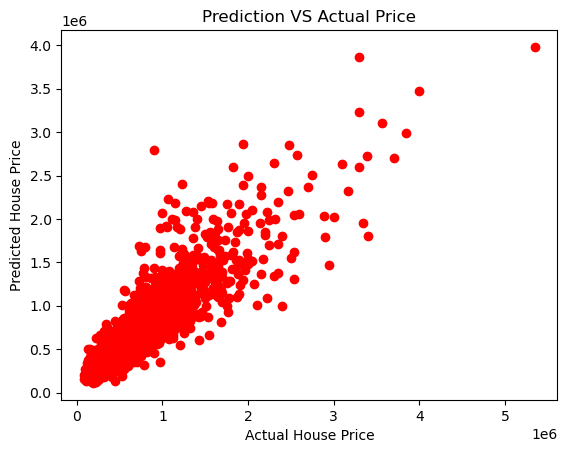

In [51]:
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred, color='r')
plt.title("Prediction VS Actual Price")
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.show()

In [52]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse=True)
sorted_importances

[('grade', 0.3367364131633206),
 ('sqft_living', 0.26863079057548034),
 ('lat', 0.2065226413055526),
 ('sqft_living15', 0.04525349799866544),
 ('waterfront', 0.02894566167422937),
 ('view', 0.02874867096129942),
 ('sqft_above', 0.02849385777577955),
 ('bathrooms', 0.02111115288735172),
 ('sqft_basement', 0.01783606325466794),
 ('floors', 0.00890027611168228),
 ('bedrooms', 0.008820974291970889)]